<a href="https://colab.research.google.com/github/SandeepMLDLNPL/Machine_Learning_Models/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle

In [52]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling_DL.csv')

In [53]:
data = shuffle(data)

In [54]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4118,4119,15782311,Feng,529,France,Male,28,9,0.00,2,1,1,52545.24,0
7731,7732,15629273,Lin,638,Germany,Male,42,8,145177.84,1,1,0,193471.74,1
1191,1192,15686909,Lung,639,Germany,Male,27,3,150795.81,1,0,1,85208.93,0
4036,4037,15640034,Milligan,551,France,Male,42,2,139561.46,1,1,0,43435.43,1
8788,8789,15603247,Bruner,743,Germany,Female,35,1,146781.24,1,1,0,189307.70,0


In [55]:
data.shape

(10000, 14)

In [56]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [57]:
X = data.drop(['RowNumber','CustomerId','Surname','Exited'],axis = 1)
y = data['Exited']

In [58]:
X.Geography.unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [59]:
label = LabelEncoder()
X['Geography'] = label.fit_transform(X['Geography'])
X['Gender'] = label.fit_transform(X['Gender'])

In [60]:
X = pd.get_dummies(X,drop_first=True,columns=['Geography'])

In [61]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [63]:
X_train.shape[1]

11

In [64]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu',input_dim = X_train.shape[1]))
model.add(keras.layers.Dense(64,activation= 'relu'))
model.add(keras.layers.Dense(32,activation= 'relu'))
model.add(keras.layers.Dense(1,activation= 'sigmoid'))

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1536      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',metrics = ['accuracy'])

In [67]:
import datetime,os
logdir = os.path.join("log",datetime.datetime.now().strftime("%Y%M%D-%H%M%S"))

In [68]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir,histogram_freq = 1)

In [69]:
r = model.fit(X_train,y_train,batch_size = 32,epochs = 50,validation_data=(X_test,y_test),
              callbacks = [tensorboard_callbacks])

Epoch 1/50
219/219 [==============================] - 3s 7ms/step - loss: 0.4276 - accuracy: 0.8217 - val_loss: 0.3743 - val_accuracy: 0.8550
Epoch 2/50
219/219 [==============================] - 1s 6ms/step - loss: 0.3559 - accuracy: 0.8543 - val_loss: 0.3467 - val_accuracy: 0.8643
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8581 - val_loss: 0.3394 - val_accuracy: 0.8617
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.3361 - accuracy: 0.8593 - val_loss: 0.3532 - val_accuracy: 0.8547
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.3307 - accuracy: 0.8631 - val_loss: 0.3415 - val_accuracy: 0.8587
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3282 - accuracy: 0.8616 - val_loss: 0.3408 - val_accuracy: 0.8593
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3216 - accuracy: 0.8699 - val_loss: 0.3419 - val_accuracy: 0.8573
Epoch 

In [71]:
test_scores = model.evaluate(X_test,y_test)
test_scores

94/94 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.8443


[0.5304269790649414, 0.8443333506584167]

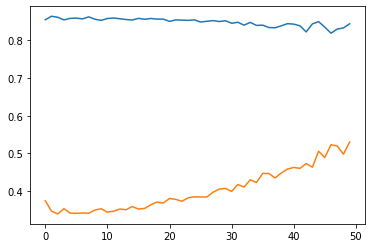

In [72]:
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['val_loss'])
plt.show()

In [110]:
y_pred = model.predict(X_test)
y_pred = np.unique(y_pred).round(1).astype('int')
y_pred = np.array(y_pred)

94/94 [==============================] - 0s 2ms/step


In [111]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [112]:
y_test = y_test[:2982]

In [113]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)

(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

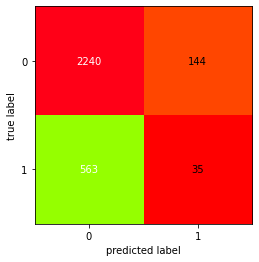

In [114]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat = cf, cmap = plt.cm.hsv)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7629107981220657

In [116]:
customer = model.predict([[615, 1, 22, 5, 20000, 5, 1, 1, 
60000, 0, 0]])
customer
if customer[0] == 1:
 print ("Customer is likely to leave")
else:
 print ("Customer will stay")

1/1 [==============================] - 0s 47ms/step
Customer will stay
